In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#loading dataset from drive

In [3]:
data=pd.read_csv('/content/drive/MyDrive/bank_data.csv')

In [4]:
#display the top five rows of the DataFrame

In [5]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [6]:
#display the last five rows of the DataFrame

In [7]:
data.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


Informations from the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [9]:
data.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [10]:
data.shape

(1882, 6)

In [11]:
data.age.value_counts()

33    82
31    68
29    68
35    67
34    62
      ..
80     5
83     5
73     4
81     4
79     1
Name: age, Length: 67, dtype: int64

In [12]:
#Histograms
#(histogram is a graphical representation of data that shows the distribution of a continuous variable)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'expected_recovery_amount'}>],
       [<Axes: title={'center': 'actual_recovery_amount'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

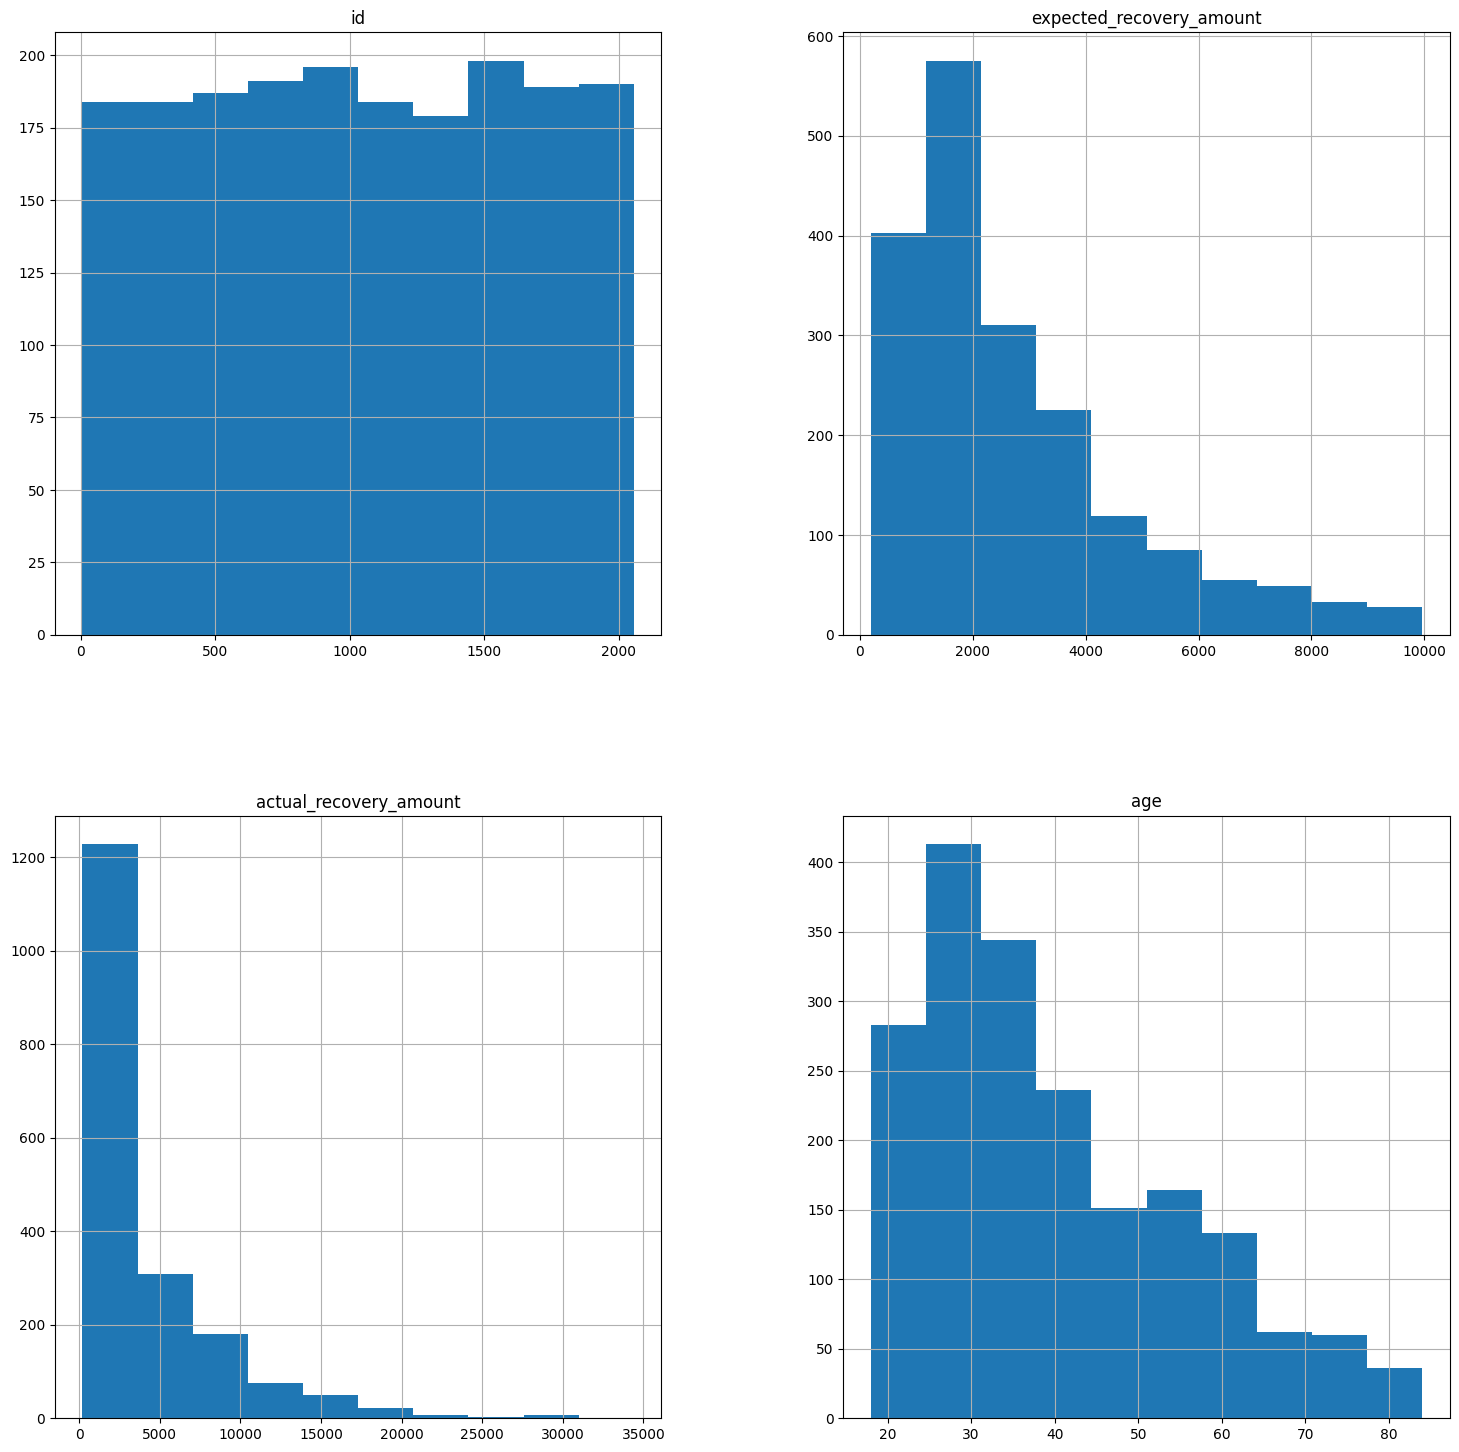

In [13]:
data.hist( figsize=(18,18))

Data Pre Processing

In [14]:
#null values

In [15]:
data.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [16]:
#here there are no null values present in the dataset

In [17]:
#here the "id" is an unwanted information present in the dataset. so we can delete it or drop it.

In [18]:
data.drop("id",axis=1,inplace=True)

In [19]:
data.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,194,263.540,Level 0 Recovery,19,Male
1,486,416.090,Level 0 Recovery,25,Female
2,527,429.350,Level 0 Recovery,27,Male
3,536,296.990,Level 0 Recovery,25,Male
4,541,346.385,Level 0 Recovery,34,Male


In [20]:
data.describe()
#It's used to generate descriptive statistics for a dataset. It provides a summary of various statistical measures for each column or variable in the dataset.

,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000
mean,2759.967588,4000.967837,39.650372
std,2019.826565,4576.506350,15.453072
min,194.000000,200.425000,18.000000
25%,1261.250000,1045.190300,28.000000
50%,2062.000000,2115.446373,35.000000
75%,3569.500000,5417.237207,50.000000
max,9964.000000,34398.479710,84.000000


In [21]:
#Histograms

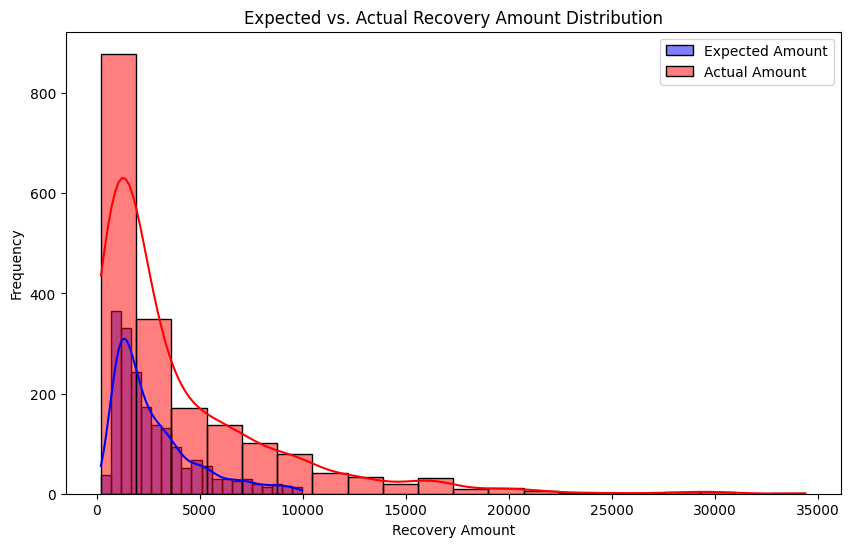

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['expected_recovery_amount'], bins=20, kde=True, color='blue', label='Expected Amount')
sns.histplot(data['actual_recovery_amount'], bins=20, kde=True, color='red', label='Actual Amount')
plt.title('Expected vs. Actual Recovery Amount Distribution')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [23]:
#Bar plot for Recovery Strategies

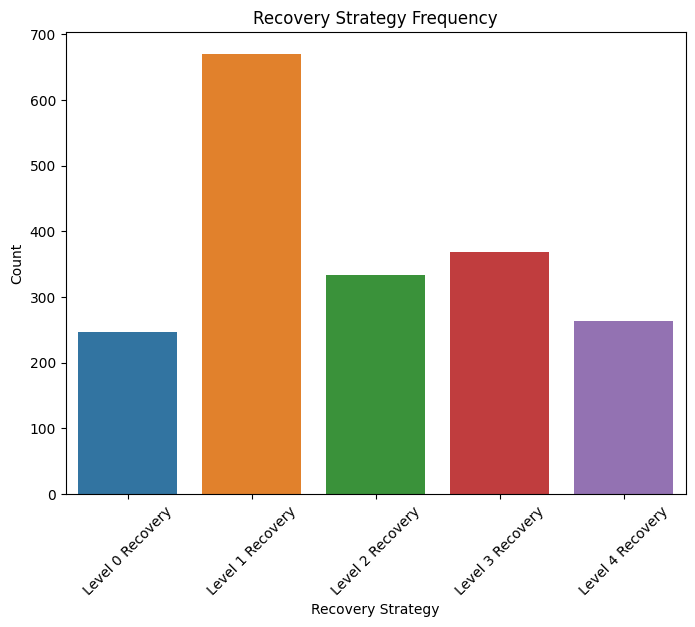

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='recovery_strategy', data=data)
plt.title('Recovery Strategy Frequency')
plt.xlabel('Recovery Strategy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Box plot for Age and Recovery Amount

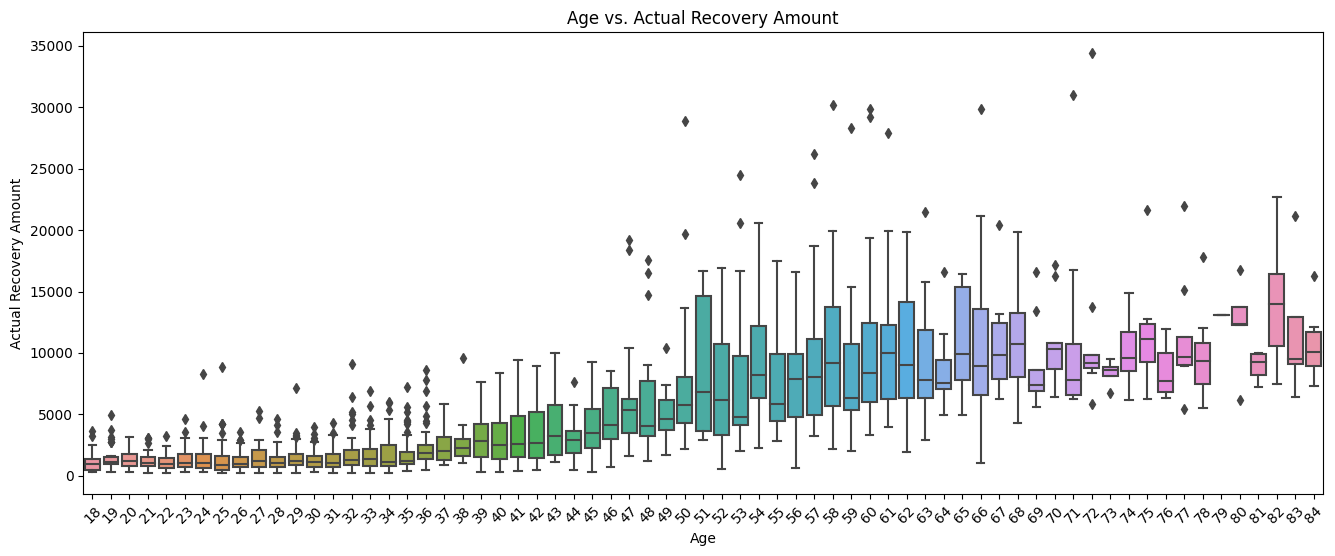

In [26]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='age', y='actual_recovery_amount', data=data)
plt.title('Age vs. Actual Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Actual Recovery Amount')
plt.xticks(rotation=45)
plt.show()

In [27]:
#Bar plot for Sex

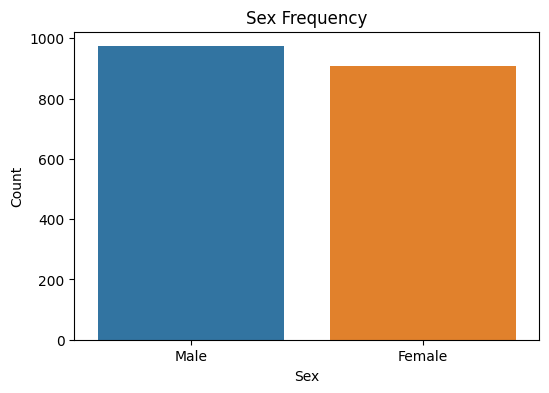

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=data)
plt.title('Sex Frequency')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Graphical exploratory data analysis

In [29]:

# Extract the relevant columns for the scatter plot
expected_recovery_amount = data['expected_recovery_amount']
age = data['age']

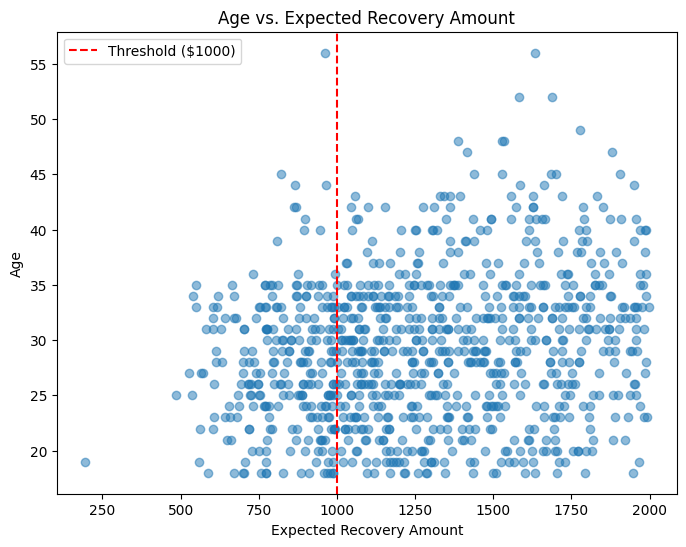

In [30]:
# Filter data for Expected Recovery Amount between $0 and $2000
window_mask = (expected_recovery_amount >= 0) & (expected_recovery_amount <= 2000)
age_window = age[window_mask]
expected_recovery_window = expected_recovery_amount[window_mask]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(expected_recovery_window, age_window, alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Age vs. Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend()
plt.show()

The scatter plot shows age on the y-axis and the Expected Recovery Amount on the x-axis. The red dashed line at $1000 represents the threshold that separates Level 0 from Level 1.

If there is a clear jump or discontinuity in age around the $1000 threshold, it suggests that customer age varies systematically across the threshold. On the other hand, if the age varies smoothly without any significant jump at the threshold, it indicates a more continuous relationship between age and Expected Recovery Amount

Statistical test: age vs. expected recovery amount

In [31]:
# Extract the relevant columns for the analysis
age = data['age']
expected_recovery_amount = data['expected_recovery_amount']

Exploratory graphical analysis: recovery amount

In [32]:
# Extract the relevant columns for the analysis
age = data['age']
expected_recovery_amount = data['expected_recovery_amount']

In [33]:
# Create a mask for Expected Recovery Amount between $900 and $1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from $900 to $1100
age_range = age[range_mask]

In [34]:
# Create masks for data just above and just below the $1000 threshold
above_threshold_mask = expected_recovery_amount > 1000
below_threshold_mask = expected_recovery_amount <= 1000

# Get the ages of customers just above and just below the threshold
age_above_threshold = age_range[above_threshold_mask[range_mask]]
age_below_threshold = age_range[below_threshold_mask[range_mask]]

In [35]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(age_above_threshold, age_below_threshold, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 1.6090357512691353
p-value: 0.10938147433215123


The t-statistic measures the difference in the mean ages of customers just above and just below the $1000 threshold.
The p-value represents the probability of observing the t-statistic by chance, assuming that there is no true difference in the mean ages between the two groups.

Here the p-value (0.109) is greater than the chosen significance level (e.g., 0.05). Therefore, we do not have strong evidence to reject the null hypothesis, which suggests that there is no significant difference in the average age of customers just above and just below the $1000 threshold.

Based on the results, we can conclude that there is no statistically significant difference in the average age between the two groups

Since the p-value is greater than 0.05, we fail to reject the null hypothesis

Statistical test: sex vs. expected recovery amount

In [36]:
# Extract the relevant columns for the analysis
sex = data['sex']
expected_recovery_amount = data['expected_recovery_amount']

In [37]:
#Filter data for the range from $900 to $1100

# Create a mask for Expected Recovery Amount between $900 and $1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from $900 to $1100
sex_range = sex[range_mask]

In [38]:
# Create a contingency table for the chi-square test

# Create a contingency table
contingency_table = pd.crosstab(sex_range, expected_recovery_amount[range_mask] > 1000)

# Rename the columns for clarity
contingency_table.columns = ['Below_Threshold', 'Above_Threshold']

In [39]:
#Perform the chi-square test

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Statistic: 0.49435761688866475
p-value: 0.48198988397369014


The Chi-Square Statistic (0.494) measures the association between the sex of the customers and their Expected Recovery Amount group (above or below the $1000 threshold).
The p-value (0.482) represents the probability of observing the Chi-Square Statistic by chance, assuming that there is no association between the variables.


The p-value (0.482) is greater than the chosen significance level (e.g., 0.05). Therefore, we do not have strong evidence to reject the null hypothesis, which suggests that there is no significant association between the sex of the customers and their Expected Recovery Amount group.
Based on the results, we can conclude that there is no statistically significant difference in the percentage of male customers just above and just below the $1000 threshold.

In [40]:
#Histograms for Expected and Actual Recovery Amounts

#Examining the distribution of expected and actual recovery amounts to understand their spread and any possible outliers.

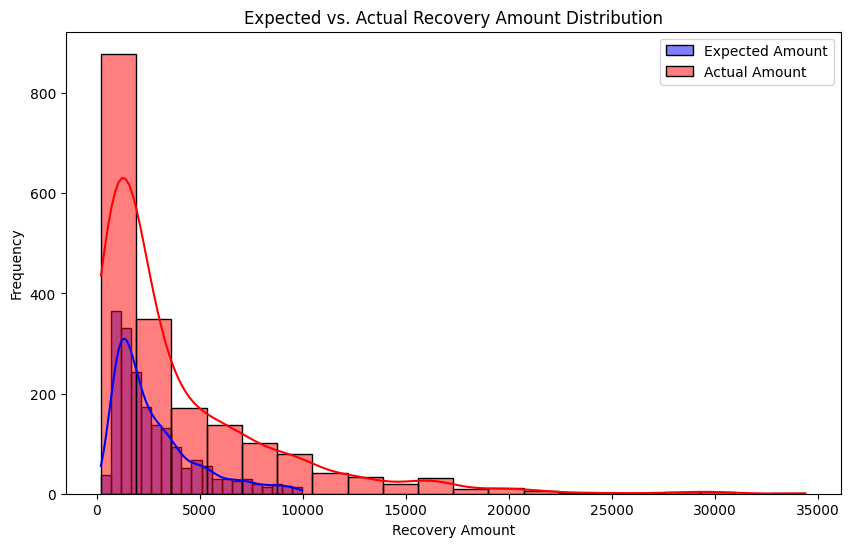

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['expected_recovery_amount'], bins=20, kde=True, color='blue', label='Expected Amount')
sns.histplot(data['actual_recovery_amount'], bins=20, kde=True, color='red', label='Actual Amount')
plt.title('Expected vs. Actual Recovery Amount Distribution')
plt.xlabel('Recovery Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [42]:
#Box plot for Recovery Amount by Recovery Strategy

#Comparing the distribution of actual recovery amounts for different recovery strategies to see if any strategies stand out as more effective.

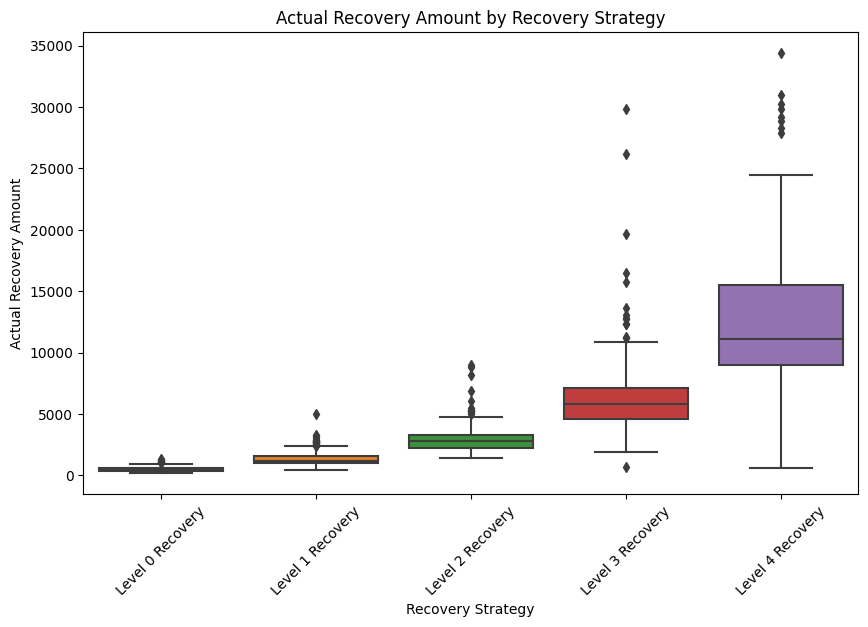

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recovery_strategy', y='actual_recovery_amount', data=data)
plt.title('Actual Recovery Amount by Recovery Strategy')
plt.xlabel('Recovery Strategy')
plt.ylabel('Actual Recovery Amount')
plt.xticks(rotation=45)
plt.show()

In [44]:
#Scatter plot for Expected vs. Actual Recovery Amount

#Observing the relationship between expected and actual recovery amounts. Check if the actual amounts closely follow the expected amounts or if there are significant deviations.

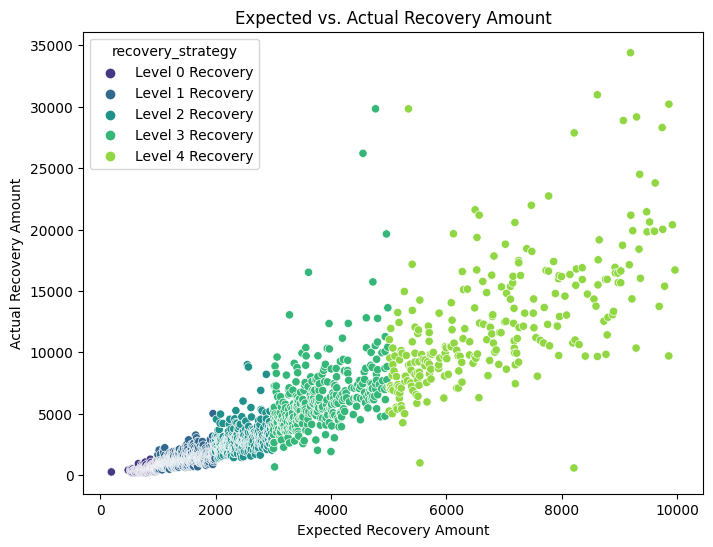

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=data, hue='recovery_strategy', palette='viridis')
plt.title('Expected vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.show()

In [46]:
#Box plot for Recovery Amount by Sex

#Comparing the distribution of actual recovery amounts for different sexes to see if there are any gender-related differences

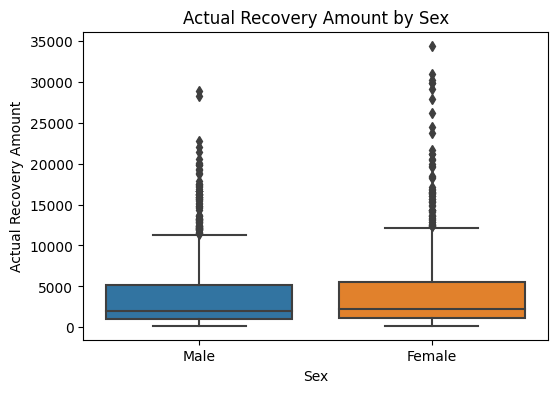

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='actual_recovery_amount', data=data)
plt.title('Actual Recovery Amount by Sex')
plt.xlabel('Sex')
plt.ylabel('Actual Recovery Amount')
plt.show()

In [48]:
#Violin plot for Recovery Amount by Age and Sex

#Exploring the relationship between age, sex, and actual recovery amounts using violin plots, which show both the distribution and density of the data.

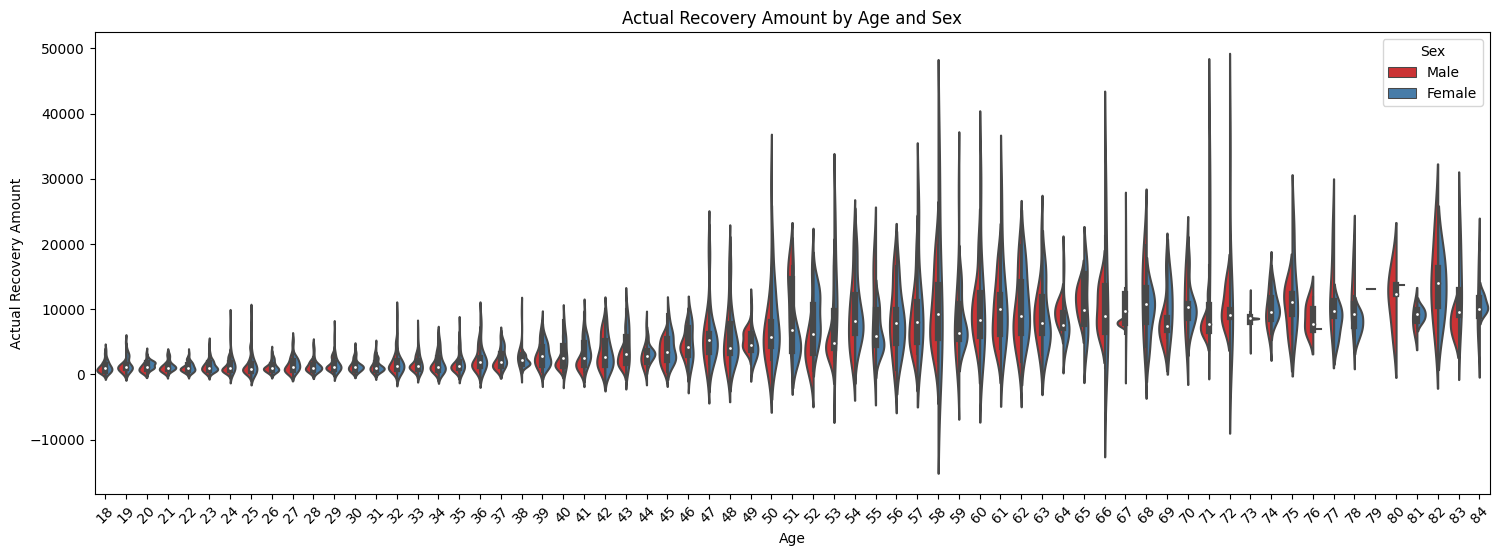

In [49]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='age', y='actual_recovery_amount', hue='sex', data=data, palette='Set1', split=True)
plt.title('Actual Recovery Amount by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Actual Recovery Amount')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper right')
plt.show()

Exploratory graphical analysis: recovery amount

In [50]:
# Extract the relevant columns for the scatter plot
expected_recovery_amount = data['expected_recovery_amount']
actual_recovery_amount = data['actual_recovery_amount']

In [51]:
# Create a mask for Expected Recovery Amount between $900 and $1100
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from $900 to $1100
expected_recovery_range = expected_recovery_amount[range_mask]
actual_recovery_range = actual_recovery_amount[range_mask]

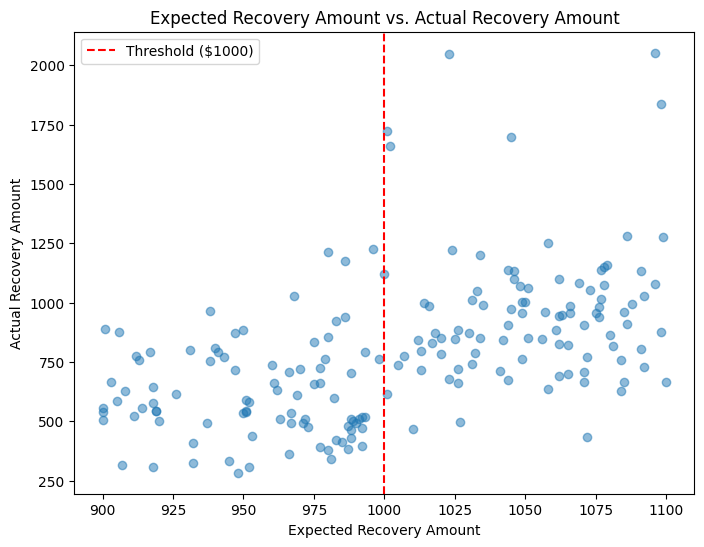

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(expected_recovery_range, actual_recovery_range, alpha=0.5)
plt.axvline(x=1000, color='red', linestyle='--', label='Threshold ($1000)')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()

Statistical analysis: recovery amount

In [53]:
#Loading the data and extract the relevant columns

In [54]:
# Extract the relevant columns for the analysis
actual_recovery_amount = data['actual_recovery_amount']
recovery_strategy = data['recovery_strategy']

In [55]:
# Create a mask for Expected Recovery Amount between $900 and $1100
window1_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

# Filter data for the range from $900 to $1100
actual_recovery_window1 = actual_recovery_amount[window1_mask]

In [56]:
# Create a mask for Expected Recovery Amount between $950 and $1050
window2_mask = (expected_recovery_amount >= 950) & (expected_recovery_amount <= 1050)

# Filter data for the range from $950 to $1050
actual_recovery_window2 = actual_recovery_amount[window2_mask]

In [57]:
#Performing the Kruskal-Wallis test

In [58]:
# Perform the Kruskal-Wallis test for the first window
kruskal_result1 = stats.kruskal(actual_recovery_window1[expected_recovery_amount[window1_mask] <= 1000],
                                actual_recovery_window1[expected_recovery_amount[window1_mask] > 1000])

# Perform the Kruskal-Wallis test for the second window
kruskal_result2 = stats.kruskal(actual_recovery_window2[expected_recovery_amount[window2_mask] <= 1000],
                                actual_recovery_window2[expected_recovery_amount[window2_mask] > 1000])

# Display the results
print("Kruskal-Wallis Test Result for Window 1:")
print("Statistic:", kruskal_result1.statistic)
print("p-value:", kruskal_result1.pvalue)

print("\nKruskal-Wallis Test Result for Window 2:")
print("Statistic:", kruskal_result2.statistic)
print("p-value:", kruskal_result2.pvalue)

Kruskal-Wallis Test Result for Window 1:
Statistic: 64.89840778685254
p-value: 7.886077128395961e-16

Kruskal-Wallis Test Result for Window 2:
Statistic: 30.9924872487249
p-value: 2.5902913533269003e-08


The Kruskal-Wallis Test Statistic measures the variability between the groups ie above and below the $1000 threshold within each window.
The p-value represents the probability of observing the Kruskal-Wallis Test Statistic by chance, assuming that there is no true difference in the distributions of actual recovery amounts between the two groups

For both Window 1 and Window 2, the p-values are much smaller than the chosen significance level e.g., 0.05. Therefore, we can conclude that there is a significant discontinuity in the actual recovery amount above the $1000 threshold for both windows.

The small p-values provide strong evidence to reject the null hypothesis, suggesting that there are significant differences in the actual recovery amount between the two groups above and below the $1000 threshold within each window.

Regression modeling: no threshold

In [59]:
import statsmodels.api as sm

In [60]:
# Extract the relevant columns for Model 1
X_model1 = data['expected_recovery_amount']
y_model1 = data['actual_recovery_amount']

In [61]:
#Build Model 1

In [62]:
# Add a constant term to the input (expected recovery amount) for the regression model
X_model1 = sm.add_constant(X_model1)

# Fit the linear regression model
model1 = sm.OLS(y_model1, X_model1).fit()

# Print the model summary
print(model1.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                            06:05:56   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [63]:
#Interpretation of Model 1:

In [64]:
# Create a dummy variable for whether the expected recovery amount is above the $1000 threshold
data['above_threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)

# Extract the relevant columns for Model 2
X_model2 = data[['expected_recovery_amount', 'above_threshold']]
y_model2 = data['actual_recovery_amount']

In [65]:
#Build Model 2

In [66]:
# Add a constant term to the inputs for the regression model
X_model2 = sm.add_constant(X_model2)

# Fit the linear regression model
model2 = sm.OLS(y_model2, X_model2).fit()

# Print the model summary
print(model2.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                            06:05:56   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Regression modeling: adding true threshold

In [67]:
#Load the data and extract the relevant columns

In [68]:

# Extract the relevant columns for the second model
X_model2 = data['expected_recovery_amount']
y_model2 = data['actual_recovery_amount']

In [69]:
#Add an indicator variable for the true threshold

In [70]:
# Create a dummy variable for whether the expected recovery amount is above the $1000 threshold
data['above_threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)

# Add the indicator variable to the input (expected recovery amount) for the regression model
X_model2 = sm.add_constant(X_model2)
X_model2['above_threshold'] = data['above_threshold']

In [71]:
#Build Model 2 - Linear Regression with Threshold Indicator

In [72]:
# Fit the linear regression model
model2 = sm.OLS(y_model2, X_model2).fit()

# Print the model summary
print(model2.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                            06:05:56   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The coefficient of the expected recovery amount represents the estimated impact on the actual recovery amount for a one-unit increase in the expected recovery amount when the threshold is not met above_threshold = 0.

The coefficient of the above_threshold dummy variable represents the estimated impact of the program at the $1000 threshold on the actual recovery amount.
By examining the model summary, you can evaluate the significance of the coefficients and the overall fit of the model.

If the coefficient of the above_threshold dummy variable is statistically significant, it suggests that there is a significant impact of the program at the $1000 threshold on the actual recovery amount. Additionally, you can compare the adjusted R-squared value of Model 2 with Model 1 to assess the improvement in model fit when including the true threshold indicator.

Regression modeling: adjusting the window

In [73]:
#Load the data and extract the relevant columns

In [74]:
# Extract the relevant columns for the analysis
expected_recovery_amount = data['expected_recovery_amount']
actual_recovery_amount = data['actual_recovery_amount']

In [75]:
#Filter data for the range from $950 to $1050

In [76]:
# Create a mask for Expected Recovery Amount between $950 and $1050
window_mask = (expected_recovery_amount >= 950) & (expected_recovery_amount <= 1050)

# Filter data for the range from $950 to $1050
actual_recovery_window = actual_recovery_amount[window_mask]
above_threshold = (expected_recovery_amount[window_mask] > 1000).astype(int)

In [77]:
#Build Model - Linear Regression with Threshold Indicator for the new window

In [78]:
# Add a constant term to the input (expected recovery amount) for the regression model
X_window = sm.add_constant(expected_recovery_amount[window_mask])

# Add the indicator variable to the input for the regression model
X_window['above_threshold'] = above_threshold

# Fit the linear regression model
model_window = sm.OLS(actual_recovery_window, X_window).fit()

# Print the model summary
print(model_window.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           2.42e-07
Time:                            06:05:56   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Interpretation of the Model for the new window:

The coefficient of the expected recovery amount represents the estimated impact on the actual recovery amount for a one-unit increase in the expected recovery amount when the threshold is not met above_threshold = 0.


The coefficient of the above_threshold dummy variable represents the estimated impact of the program at the $1000 threshold on the actual recovery amount.
By examining the model summary for the new window, you can assess whether the coefficient of the above_threshold dummy variable remains statistically significant and whether the estimated impact on the actual recovery amount is similar to the previous window. If the results are consistent across both windows, it adds confidence that the impact of the higher recovery strategy is robust and not sensitive to the specific window chosen for the analysis.